## GRU Implementation

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### Data Preprocessing

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [4]:
dt = df.set_index('Date').rename_axis(None)
dt

,Open,High,Low,Close,Adj Close,Volume
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [5]:
data = dt['Close'].values.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler

# Using MinMaxScaler to scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [6]:
# Function to create dataset with look_back data
import numpy as np

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i: (i + look_back)])
        y.append(dataset[i + look_back])

    return np.array(X), np.array(y)

In [7]:
# Setting the look_back period
look_back = 60

# Creating Dataset
train_size = int(len(scaled_data) * 0.80)

train, test = scaled_data[:train_size], scaled_data[train_size:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


### Model Building

In [8]:
# Building GRU Model
from keras.models import Sequential
from keras.layers import Dense, GRU

model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training Model
model.fit(
    trainX,
    trainY,
    batch_size=32,
    epochs=100,
    validation_data=(testX, testY),
    verbose=1
    )

Epoch 1/100
49/49 [==============================] - 5s 27ms/step - loss: 0.0046 - val_loss: 9.6990e-04
Epoch 2/100
49/49 [==============================] - 1s 12ms/step - loss: 1.3594e-04 - val_loss: 4.7346e-04
Epoch 3/100
49/49 [==============================] - 1s 11ms/step - loss: 1.1623e-04 - val_loss: 4.5555e-04
Epoch 4/100
49/49 [==============================] - 1s 11ms/step - loss: 1.1032e-04 - val_loss: 4.3615e-04
Epoch 5/100
49/49 [==============================] - 1s 11ms/step - loss: 1.0613e-04 - val_loss: 4.9821e-04
Epoch 6/100
49/49 [==============================] - 1s 11ms/step - loss: 1.0088e-04 - val_loss: 3.9198e-04
Epoch 7/100
49/49 [==============================] - 1s 12ms/step - loss: 9.5815e-05 - val_loss: 3.6628e-04
Epoch 8/100
49/49 [==============================] - 1s 12ms/step - loss: 9.2576e-05 - val_loss: 3.4351e-04
Epoch 9/100
49/49 [==============================] - 1s 11ms/step - loss: 9.1159e-05 - val_loss: 3.4319e-04
Epoch 10/100
49/49 [============

#### Making Predictions

In [9]:
# Making Predictions
train_Predict = model.predict(trainX)
test_Predict = model.predict(testX)

# Inverting predictions to original scale
train_Predict = scaler.inverse_transform(train_Predict)
test_Predict = scaler.inverse_transform(test_Predict)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

11/11 [==============================] - 0s 4ms/step


#### Evaluating Results

In [10]:
from sklearn.metrics import mean_squared_error

train_Score = np.sqrt(mean_squared_error(trainY, train_Predict))
test_Score = np.sqrt(mean_squared_error(testY, test_Predict))

print(f'Train Score (RMSE): {train_Score}')
print(f'Test Score (RMSE): {test_Score}')

Train Score (RMSE): 1.6979980264629058
Test Score (RMSE): 3.9682277073377623


#### Plotting Results

In [11]:
# Shifting train predictions for plotting
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back : len(train_Predict) + look_back, :] = train_Predict

# Shifting test predictions for plotting
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_Predict) + (look_back*2) + 1 : len(scaled_data) - 1, :] = test_Predict

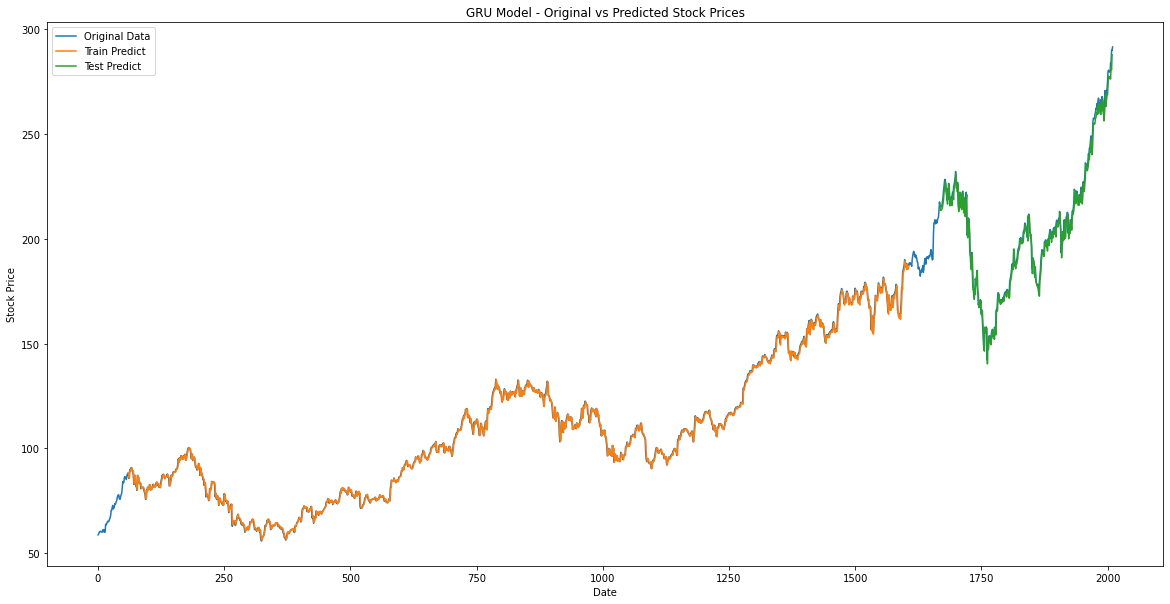

In [12]:
# Plotting baseline and predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.title('GRU Model - Original vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### Making Forecasts

In [13]:
# Defining the function to forecast next n days
def forecast_next_days(model, data, n_days, look_back):
    forecast = []
    last_sequence = data[-look_back:]
    current_sequence = np.reshape(last_sequence, (1, look_back, 1))

    for _ in range(n_days):
        next_value = model.predict(current_sequence)
        forecast.append(next_value[0, 0])
        current_sequence = np.append(
            current_sequence[:, 1:, :],
            next_value.reshape(1,1,1),
            axis=1
            )
    
    return np.array(forecast)

In [14]:
# Number of days to forecast
n_days = 30

# Getting the last look_back days from the dataset
last_sequence = scaled_data[-look_back:]

# Forecasting next 30 days
forecasted_values = forecast_next_days(model, scaled_data, n_days, look_back)

# Inverting the scaled predictions back to the original scale
forecasted_values = scaler.inverse_transform(forecasted_values.reshape(-1,1))

# Creating a Dataframe for plotting
forecast_dates = pd.date_range(
    start = dt.index[-1] + pd.Timedelta(days=1),
    periods = n_days,
    freq = 'B'
)

forecast_df = pd.DataFrame(
    forecasted_values,
    index = forecast_dates,
    columns = ['Forecast']
)

1/1 [==============================] - 0s 21ms/step


#### Plotting the results

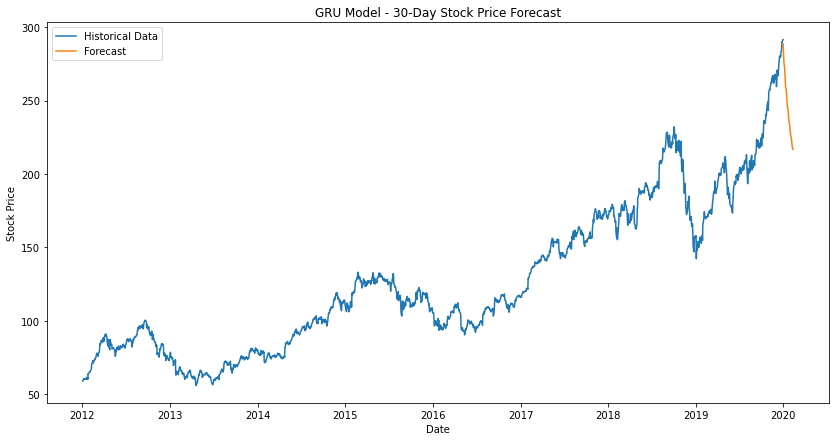

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(dt['Close'], label='Historical Data')
plt.plot(forecast_df, label='Forecast')
plt.title('GRU Model - 30-Day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Hyperparameter Tuning

In [16]:
# Creating a function to create a GRU model
def create_model(units=50, activation='relu', optimizer='adam'):
    
    model = Sequential()
    model.add(GRU(units=units, return_sequences=True, input_shape=(look_back, 1)))
    model.add(GRU(units=units, return_sequences=False))
    model.add(Dense(units=25, activation=activation))
    model.add(Dense(units=1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

In [22]:
# Wraping the model using the function
from keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn=create_model, verbose=0)

In [23]:
# Defining the hyperparameter grid to search

param_grid = {
    'batch_size' : [16, 32, 64],
    'epochs' : [50, 100, 200],
    'units' : [50, 100, 150],
    'optimizer' : ['adam', 'rmsprop'],
    'activation' : ['relu', 'tanh']
}

In [24]:
# Data Splitting

# Setting the look_back period
look_back = 60

# Creating Dataset

train_size = int(len(scaled_data) * 0.80)
train, test = scaled_data[:train_size], scaled_data[train_size:]
trainX, trainY = create_dataset(train, look_back)
trainX, trainY = create_dataset(test, look_back)

In [26]:
# Grid Search
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error',
    cv = 3,
    verbose = 1,
    n_jobs = 1
)

grid_search = grid.fit(trainX, trainY)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [29]:
print(f'Best Score: {grid_search.best_score_} \nusing {grid_search.best_params_}')

Best Score: -0.0002559135546745299 
using {'activation': 'tanh', 'batch_size': 32, 'epochs': 200, 'optimizer': 'adam', 'units': 100}


#### Forecasting using Optimized Parameters

In [34]:
# Building Model using optimized parameters
best_model = Sequential()
best_model.add(GRU(units=100, return_sequences=True, input_shape=(look_back, 1)))
best_model.add(GRU(units=100, return_sequences=False))
best_model.add(Dense(units=25, activation='tanh'))
best_model.add(Dense(units=1))
best_model.compile(optimizer='adam', loss='mean_squared_error')

# Training Model
best_model.fit(trainX, trainY, batch_size=32, epochs=200)

Epoch 1/200
49/49 [==============================] - 3s 10ms/step - loss: 0.0047
Epoch 2/200
49/49 [==============================] - 1s 10ms/step - loss: 1.4078e-04
Epoch 3/200
49/49 [==============================] - 0s 10ms/step - loss: 1.1005e-04
Epoch 4/200
49/49 [==============================] - 1s 11ms/step - loss: 1.0101e-04
Epoch 5/200
49/49 [==============================] - 1s 10ms/step - loss: 9.8319e-05
Epoch 6/200
49/49 [==============================] - 1s 10ms/step - loss: 9.4069e-05
Epoch 7/200
49/49 [==============================] - 0s 10ms/step - loss: 9.0612e-05
Epoch 8/200
49/49 [==============================] - 1s 10ms/step - loss: 8.7308e-05
Epoch 9/200
49/49 [==============================] - 1s 11ms/step - loss: 8.3389e-05
Epoch 10/200
49/49 [==============================] - 1s 10ms/step - loss: 8.6499e-05
Epoch 11/200
49/49 [==============================] - 1s 11ms/step - loss: 9.1428e-05
Epoch 12/200
49/49 [==============================] - 1s 11ms/step 

In [35]:
# Number of days to forecast
n_days = 30

# Getting the last look_back days from the dataset
last_sequence = scaled_data[-look_back:]

# Forecasting next 30 days
forecasted_values = forecast_next_days(best_model, scaled_data, n_days, look_back)

# Inverting the scaled predictions back to the original scale
forecasted_values = scaler.inverse_transform(forecasted_values.reshape(-1,1))

# Creating a Dataframe for plotting
forecast_dates = pd.date_range(
    start = dt.index[-1] + pd.Timedelta(days=1),
    periods = n_days,
    freq= 'B'
)

forecast_df = pd.DataFrame(
    forecasted_values,
    index=forecast_dates,
    columns=['Forecast']
)

1/1 [==============================] - 0s 21ms/step


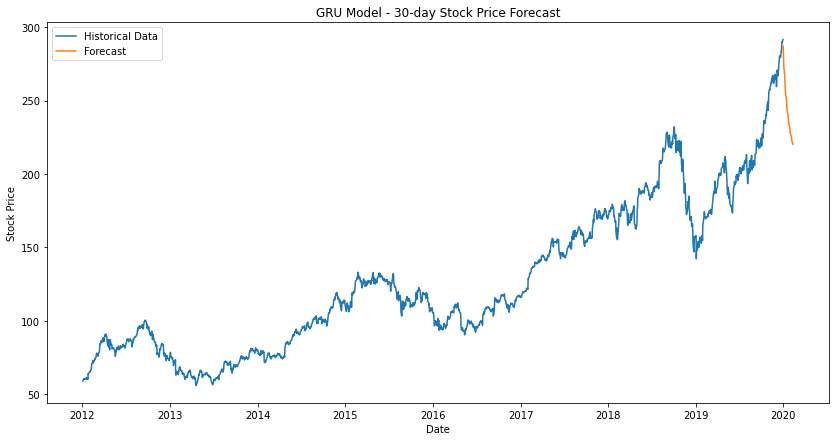

In [36]:
# Plotting the Forecast
plt.figure(figsize=(14,7))
plt.plot(dt['Close'], label='Historical Data')
plt.plot(forecast_df, label='Forecast')
plt.title('GRU Model - 30-day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()